In [124]:
# Cogs 118C
# HW4 (solutions

In [125]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

### Q 1

In [126]:
# implementing heaviside_step
def heaviside_step(t):
    if(t >= 0) : 
        return 1
    return 0
step_vec = np.vectorize(heaviside_step)


In [127]:
def h(t, tau):
    return (1 / tau) * np.heaviside(t,1) * np.exp(-t / tau)

In [138]:
ts = 1/1000

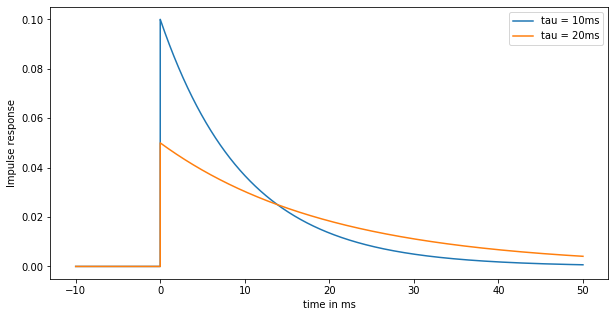

In [139]:
t_time = np.arange(-10, 50, ts)
# plotting
plt.figure(figsize=(10,5))

plt.plot(t_time, h(t_time, 10), '-', label= "tau = 10ms")
plt.plot(t_time, h(t_time, 20), '-', label= "tau = 20ms")

plt.xlabel('time in ms')
plt.ylabel('Impulse response')
plt.legend()

### B
The larger the time constant the smaller the initial peak is and the slower the impulse response decays to zero.

### C

$$ H(ω) = \int_{\infty}^{-\infty} h(t) e ^{iω\tau} dt$$
$$ H(ω) = \int_{\infty}^{0} \frac{1}{\tau} e ^{-(\frac{1}{\tau} iω)t} dt$$
$$ H(ω) = \frac{1}{\tau} \times \frac{1}{\frac{1}{\tau} + iω}$$
$$ H(ω) = \frac{1}{1+\tau iω}$$

### G

$$ g(ω) = |H(ω)|$$
$$ g(ω) = \sqrt{H(ω) \times \overline{H(ω)}}$$
$$ g(ω) = \sqrt{\frac{1}{1+\tau iω} \times \frac{1}{1-\tau iω}}$$
$$ g(ω) = \sqrt{\frac{1}{1+(\tau ω)^2} }$$
$$ g(ω = 0) = \sqrt{\frac{1}{1+ \tau \times 0} } = 1$$

In [140]:
def g(tau, omega):
    return 20 * np.log10(1/(1+(tau*omega)**2))
           
print('gain for ω=0 : ', g(0.02, 0))


gain for ω=0 :  0.0


Text(0, 0.5, 'Gain (Db)')

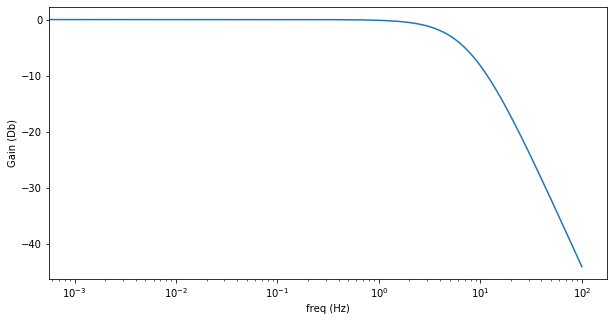

In [141]:
freq = np.arange(0, 10**2, ts)
omega = 2 * np.pi * freq

plt.figure(figsize=(10,5))

plt.plot(freq, g(0.02, omega), '-')
plt.xscale('log')

plt.xlabel('freq (Hz)')
plt.ylabel('Gain (Db)')

In [145]:
print('suppression for ω=60 tau=0.02s : ', g(0.02, 60 * 2 * np.pi), 'Db')
print('suppression for ω=60 tau=20: ', g(20, 60 * 2 * np.pi), 'Db', 'incorect since tau is in ms and freq is in cycle per second (Hz)')  

suppression for ω=60 tau=0.02s :  -35.24590531035659 Db
suppression for ω=60 tau=20:  -155.0944447290186 Db incorect since tau is in ms and freq is in cycle per second (Hz)


### G

$$ H(\omega) = \frac{1}{1+i\tau \omega} = \frac{1}{1+i \tau \omega} \times \frac{1-i \tau \omega}{1-i\tau \omega} = \frac{1}{1+(\tau \omega)^2} - \frac{i\tau \omega}{1+(\tau \omega)^2}$$
$$ \tan(\omega) =  \frac{Im[H(\omega)]}{Re[H(\omega)]} $$
$$ \tan(\omega) =  \frac{-i\tau \omega}{1+(\tau \omega)^2} \times \frac{1+(\tau \omega)^2}{1}$$
$$ \tan(\omega) =  -i\tau \omega$$

### Q 2

In [111]:
# Load the audio file
data = np.loadtxt('hw4_audio.csv',delimiter=',')
t = data[:,0]
x = data[:,1]
Fs = 44100 # Sampling rate in Hz

In [112]:
# (a) Save a .wav audio file. You should be able to download
# this file and play it to your speakers. How does it sound?
from scipy.io import wavfile
wavfile.write('hw4_audio_a.wav',Fs,x)

You should hear white noise

Text(0, 0.5, 'Audio Signal (uV)')

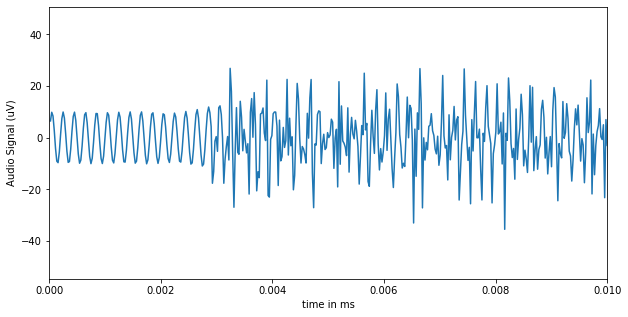

In [113]:
# (b) Make a plot showing the first 10 ms of the signal.
# Do you notice a strong sinusoidal oscillation? 
plt.figure(figsize=(10,5))
plt.plot(t, x, '-')
plt.xlim([0,0.010])
plt.xlabel('time in ms')
plt.ylabel('Audio Signal (uV)')

Their is a constant sinusoidal oscillation 

Text(0, 0.5, 'Power (uV^2)')

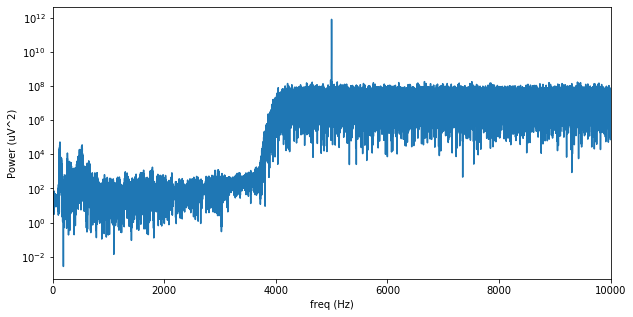

In [114]:
# (c) Plot the power spectrum of the signal. Use 
# log scale for the y-axis. Use plt.xlim() to zoom 
# in on the frequency range from 0 to 10 kHz. Finally,
# make sure to label the axes. 
#
# Hint: use np.fft.fft, np.fft.fftfreq
freq = np.fft.fftfreq(len(t), 1/Fs)
X = np.fft.fft(x)
power =  np.abs(X) ** 2


plt.figure(figsize=(10,5))
plt.plot(freq[freq > 0],power[freq > 0], '-')
plt.xlim([0,10**4])

plt.yscale('log')
plt.xlabel('freq (Hz)')
plt.ylabel('Power (uV^2)')


Largest peak is at  5000.0 HZ with a power of  21471


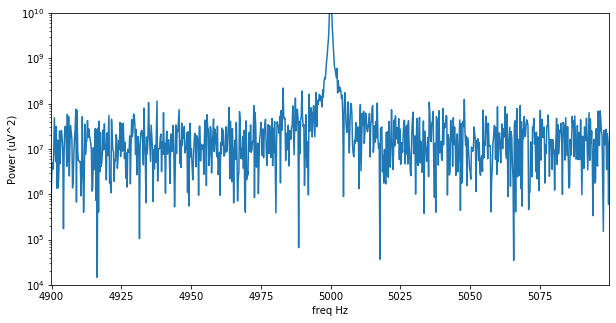

In [115]:
# (d) What is the exact frequency of the largest peak
# in the power spectrum? Hint: You may need to zoom in even
# further on the plot you made in (c) to see exactly where
# the peak is.

plt.figure(figsize=(10,5))
plt.plot(freq[freq > 0],power[freq > 0], '-', label= "")

max_peak = np.argmax(power)
max_freq = freq[max_peak]

plt.xlim([max_freq- 100,max_freq + 100])
plt.ylim([10**4,10**10])

plt.yscale('log')
plt.xlabel('freq Hz')
plt.ylabel('Power (uV^2)')

print('Largest peak is at ', round(max_freq), 'HZ with a power of ', max_peak)

Text(0, 0.5, 'Power (uV^2)')

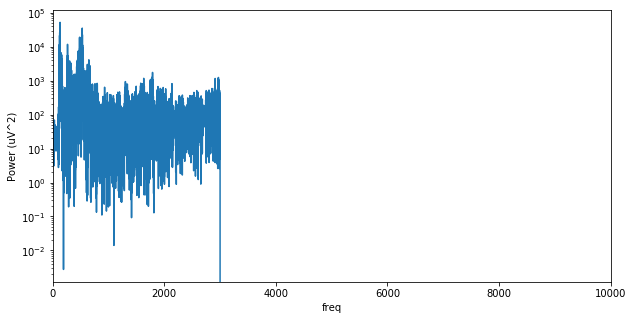

In [116]:
# (e) Ideal filter: Make a filter, H, that will remove frequencies
# f>3 kHz. Plot the product of H with X, the Fourier transform of x

# To get you started, here is how to create H:
H = np.abs(freq)<3000

H_X = H * X
H_X_power = np.abs(H_X) ** 2
plt.figure(figsize=(10,5))
plt.plot(freq,H_X_power)
plt.xlim(0,10**4)
plt.yscale('log')
plt.xlabel('freq')
plt.ylabel('Power (uV^2)')


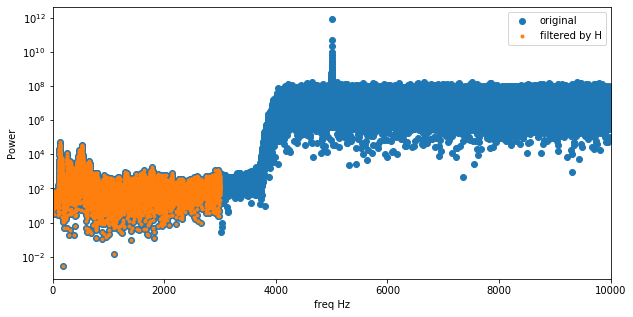

In [117]:

plt.figure(figsize=(10,5))
plt.plot(freq[freq > 0],power[freq > 0], 'o', label= "original")
plt.plot(freq,H_X_power, '.', label= "filtered by H")

plt.xlim([0,10**4])

plt.yscale('log')
plt.xlabel('freq Hz')
plt.ylabel('Power')
plt.legend(loc='upper right')


The plot look the same for freq < 3000 and is zero for the rest 

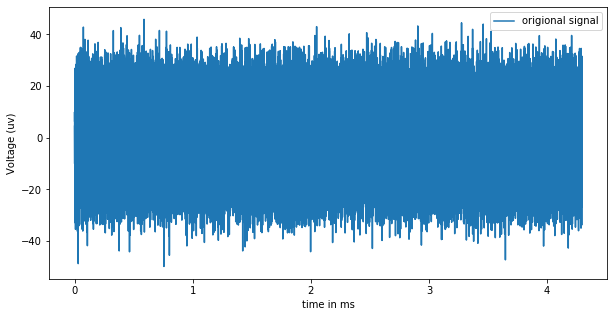

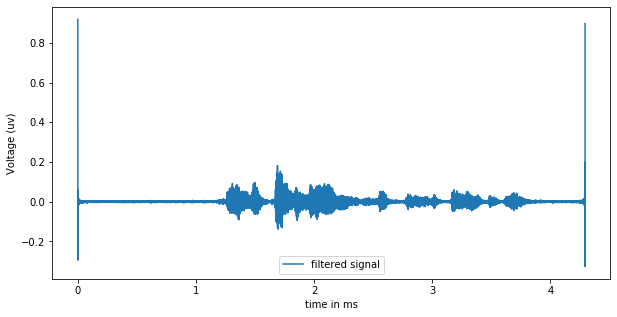

In [118]:
filtered_Signal = np.fft.ifft(H_X)

plt.figure(figsize=(10,5))
plt.plot(t, x, '-', label= 'origional signal')
plt.xlabel('time in ms')
plt.ylabel('Voltage (uv)')
plt.legend()

plt.figure(figsize=(10,5))
plt.plot(t,filtered_Signal.real, '-', label= 'filtered signal')
plt.xlabel('time in ms')
plt.ylabel('Voltage (uv)')
plt.legend()

You should hear "In order to understand the mind you should understand the brain"

In [119]:
# (f) Use the convolution theorem to calculate the filtered signal.
# To do this, note that the filtered signal is the inverse Fourier transform
# (ifft) of the product of the Fourier transforms of x and h.
# Save a .wav audio file containing the filtered signal. Download and listen to it. 
# Describe what you hear.
wavfile.write('hw_4_f.wav', Fs,np.real(filtered_Signal).astype(x.dtype))
# Hint: use wavfile.write


Text(0, 0.5, 'Filter function h(n)')

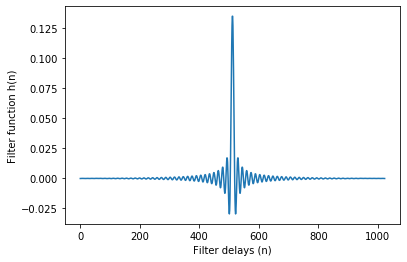

In [120]:
# Design a better high-pass filter using a finite impulse response (FIR)
# convolution. We will create a filter with order n=1024
from scipy import signal
n = 1024
h = signal.firwin(n,cutoff=3000,fs=Fs) # This function designs a FIR filter
plt.plot(h)
plt.xlabel('Filter delays (n)')
plt.ylabel('Filter function h(n)')

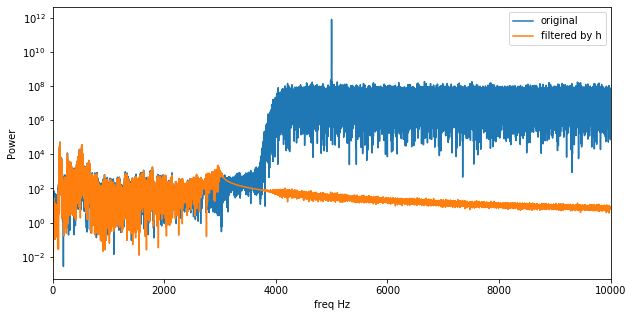

In [121]:
# (g) Apply the high-pass filter we designed to remove the high frequencies
# from the data. You may use np.convolve, with mode='same' so that the output
# has the same size as the input. Plot the power spectrum of the filtered signal, 
# again showing the range 0 to 10 kHz. Comment on the similarity and difference
# of this spectrum from the original spectrum (part c).

filtered_x = np.convolve(x,h,mode='same')
filtered_X = np.fft.fft(filtered_x)
filtered_power = np.abs(filtered_X) **2


plt.figure(figsize=(10,5))
plt.plot(freq[freq > 0],power[freq > 0], '-', label= "original")
plt.plot(freq[freq > 0],filtered_power[freq > 0], '-', label= "filtered by h")

plt.xlim([0,10**4])

plt.yscale('log')
plt.xlabel('freq Hz')
plt.ylabel('Power')
plt.legend()

The plot look similar for freq < 3000. For freq  greater then 3000 the filter greatly reduced their power. 

In [122]:
# (h) Save the filtered signal as a .wav file and listen 
# to it on your speakers. What is the “secret” message 
# (actually a quote from the eminent UCSD neuro-philosopher
# Patricia Churchland)?\

filtered_Signal = np.fft.ifft(filtered_X)

wavfile.write('hw_4_h.wav', Fs,np.real(filtered_Signal).astype(x.dtype))
